# Lagrange interpolation

In [89]:
def lagrange_interpolation(x, xi, yi):
    """ Return the Lagrange polynomial interpolating (xi, yi)_i,
        evaluated at x
    """
    p = 0
    d = len(xi)
    assert(len(xi) == len(yi))
    for i in range(d):
        l = 1
        for j in range(d):
            if i != j:
                l *= (x - xi[j]) / (xi[i] - xi[j])
        p += l * yi[i]
    return p

In [116]:
def newton_interpolation(x, xi, yi):
    d = len(xi)
    divided_diff = np.zeros((d, d))
    divided_diff[:, 0] = yi
    for j in range(1, d):
        for i in range(j, d):
            divided_diff[i, j] = divided_diff[i, j - 1] - divided_diff[i - 1, j - 1]
            divided_diff[i, j] /= xi[i] - xi[i - j]
    p = 0
    for k in range(d):
        w = 1
        for i in range(k):
            w *= x - xi[i]
        p += w * divided_diff[k, k]
    return p

In [112]:
def interpolate_sequence(x, xi, yi, method='lagrange'):
    p = len(x)
    y = np.zeros(p)
    for i in range(p):
        if method == 'lagrange':
            y[i] = lagrange_interpolation(x[i], xi, yi)
        elif method == 'newton':
            y[i] = newton_interpolation(x[i], xi, yi)
    return y

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
from math import pi

T = 100

# Interpolation points
xi = np.arange(0, 4) * pi / 2
yi = np.cos(xi)

# True function
x = np.linspace(0, 2 * pi, T)
ytrue = np.cos(x)

ylagrange = interpolate_sequence(x, xi, yi, method='lagrange')
ynewton = interpolate_sequence(x, xi, yi, method='newton')
# Function with only 3 interpolation points
# ylagrange3 = interpolate_sequence(x, xi[:3], yi[:3], method='lagrange')

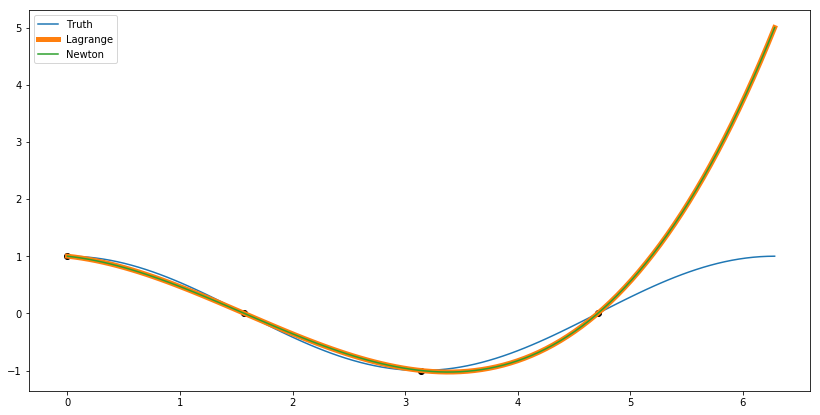

In [120]:
fig = plt.figure(figsize=(14, 7))
plt.plot(x, ytrue, label='Truth')
plt.plot(x, ylagrange, linewidth=5, label='Lagrange')
plt.plot(x, ynewton, label='Newton')
#plt.plot(x, ylagrange3, label='Lagrange 3')
plt.scatter(xi, yi, color='black')
plt.legend()